In [2]:
# Data Handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score

In [3]:
# load data
df=pd.read_csv('loan_data.csv')

In [4]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [7]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [8]:
# Fill missing numeric values with column mean (if any)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Fill missing categorical value with mode
if df['purpose'].isnull().sum() > 0:
    df['purpose'].fillna(df['purpose'].mode()[0], inplace=True)


/tmp/ipykernel_222256/860663531.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [9]:
# Check data types of all columns
df.dtypes


credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [10]:
# one hot encoding for purpose column
df = pd.get_dummies(df, columns=['purpose'], drop_first=True)


In [11]:
scaler = StandardScaler()

# List of numeric columns (excluding target)
features_to_scale = df.drop('not.fully.paid', axis=1).select_dtypes(include=['int64', 'float64']).columns
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])


In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df['not.fully.paid'].value_counts(normalize=True)


not.fully.paid
0    0.839946
1    0.160054
Name: proportion, dtype: float64

In [14]:
df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,0.492222,-0.139318,2.463099,0.680388,0.998505,0.688825,0.432230,0.353732,0.182704,-0.716989,-0.299730,-0.237003,0,False,True,False,False,False,False
1,0.492222,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.721230,0.495018,1.030602,-0.716989,-0.299730,-0.237003,0,True,False,False,False,False,False
2,0.492222,0.486484,0.230708,-0.908659,-0.141885,-0.759742,0.059770,-0.397073,-0.730683,-0.262470,-0.299730,-0.237003,0,False,True,False,False,False,False
3,0.492222,-0.813544,-0.757022,0.680388,-0.654697,0.030385,-0.745277,0.496321,0.909966,-0.262470,-0.299730,-0.237003,0,False,True,False,False,False,False
4,0.492222,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.198161,-0.360663,-0.251586,-0.716989,1.531147,-0.237003,0,True,False,False,False,False,False


# EDA & Data visualization

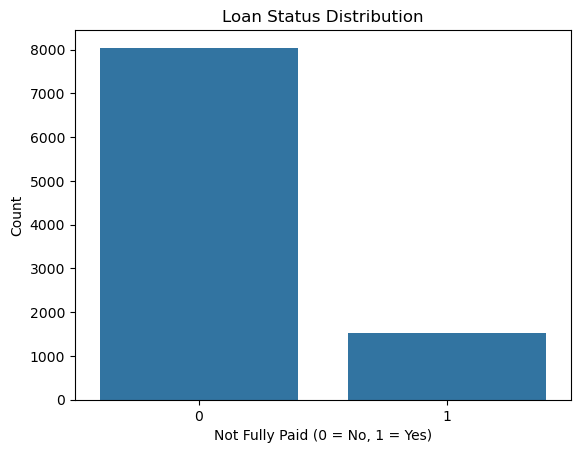

In [15]:
# 1. How many loans were fully paid vs not paid?

sns.countplot(x='not.fully.paid', data=df)
plt.title('Loan Status Distribution')
plt.xlabel('Not Fully Paid (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

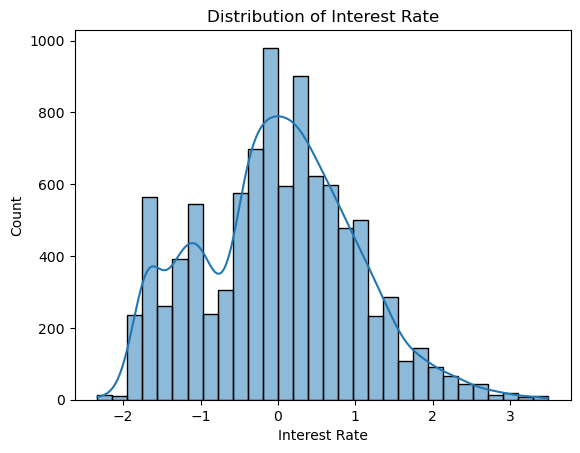

In [16]:
# 2. Distribution of Interest Rate
sns.histplot(df['int.rate'], kde=True, bins=30)
plt.title('Distribution of Interest Rate')
plt.xlabel('Interest Rate')
plt.show()

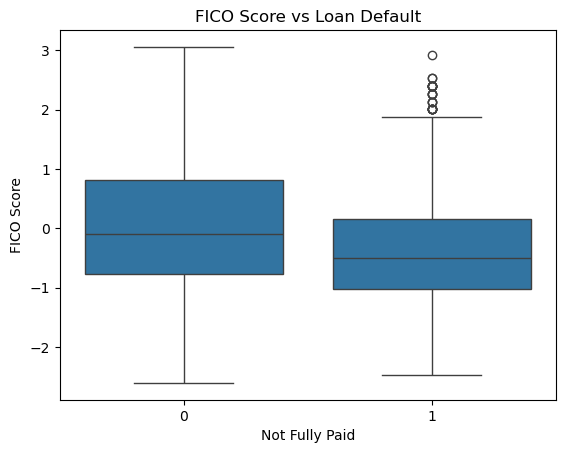

In [17]:
# 3. FICO Score vs Loan Default
sns.boxplot(x='not.fully.paid', y='fico', data=df)
plt.title('FICO Score vs Loan Default')
plt.xlabel('Not Fully Paid')
plt.ylabel('FICO Score')
plt.show()


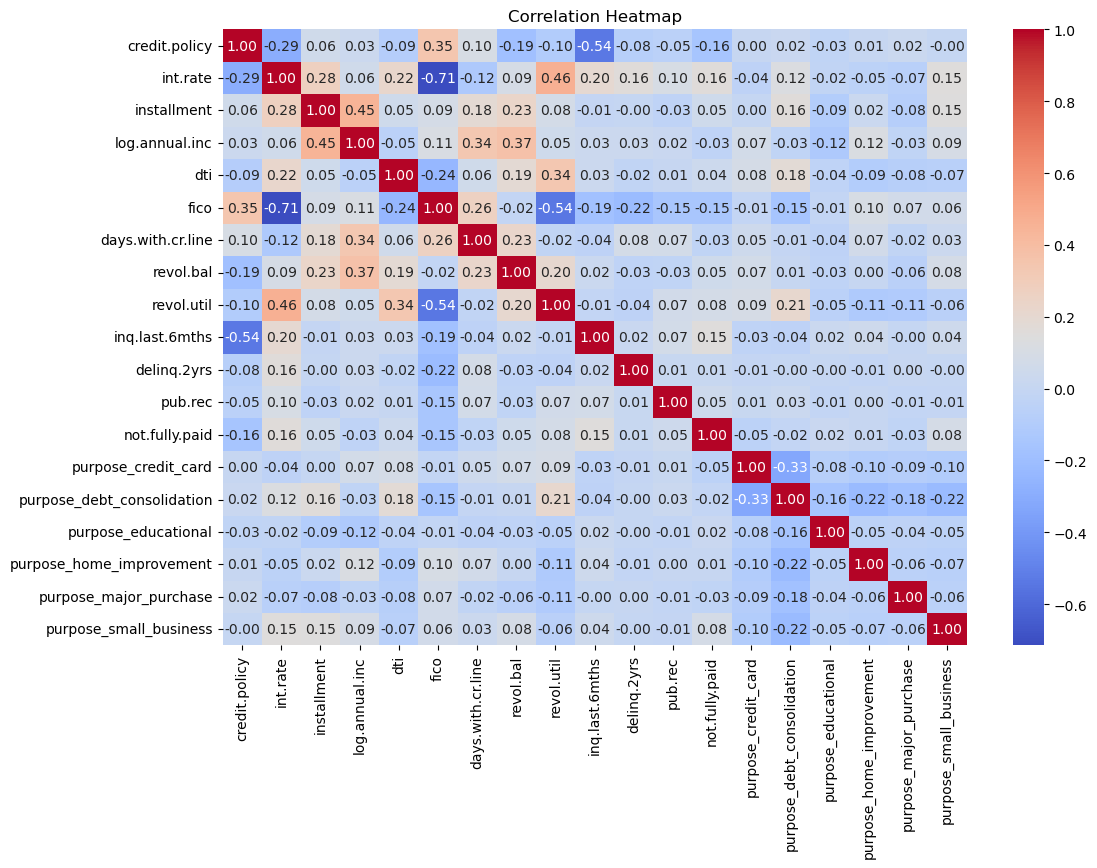

In [18]:
# 4. Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

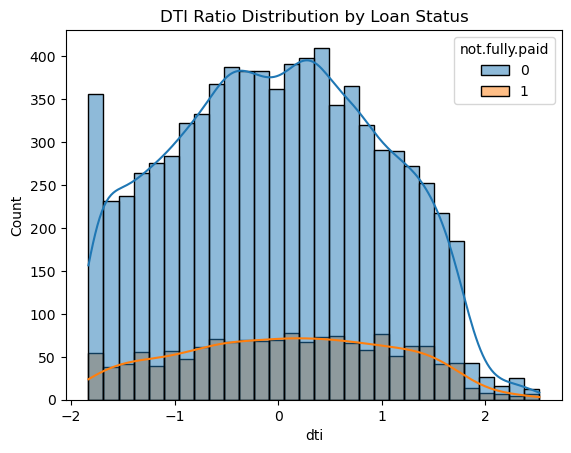

In [19]:
# 5. DTI (Debt-to-Income) Ratio Distribution
sns.histplot(data=df, x='dti', hue='not.fully.paid', kde=True, bins=30)
plt.title('DTI Ratio Distribution by Loan Status')
plt.show()

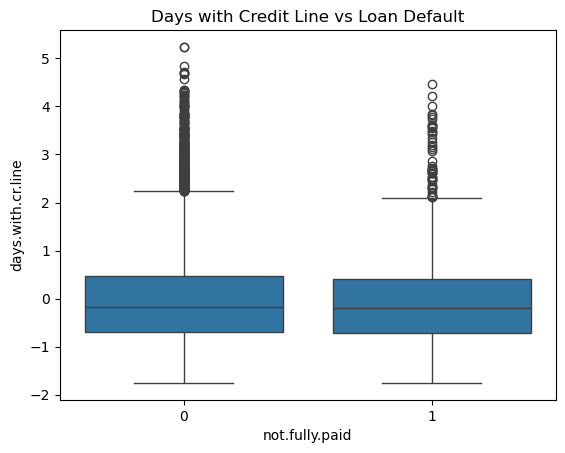

In [20]:
# 6. Days with Credit Line vs Loan Status
sns.boxplot(x='not.fully.paid', y='days.with.cr.line', data=df)
plt.title('Days with Credit Line vs Loan Default')
plt.show()


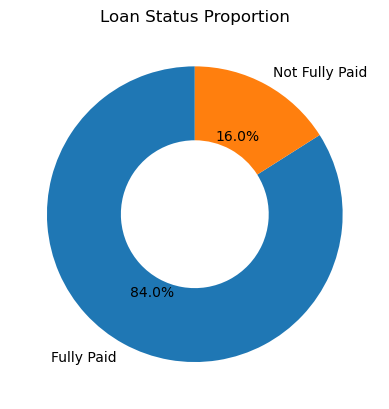

In [21]:
#7. Donut Chart – Loan Status Proportion
loan_counts = df['not.fully.paid'].value_counts()
plt.pie(loan_counts, labels=['Fully Paid', 'Not Fully Paid'], autopct='%1.1f%%', startangle=90, wedgeprops={'width':0.5})
plt.title('Loan Status Proportion')
plt.show()


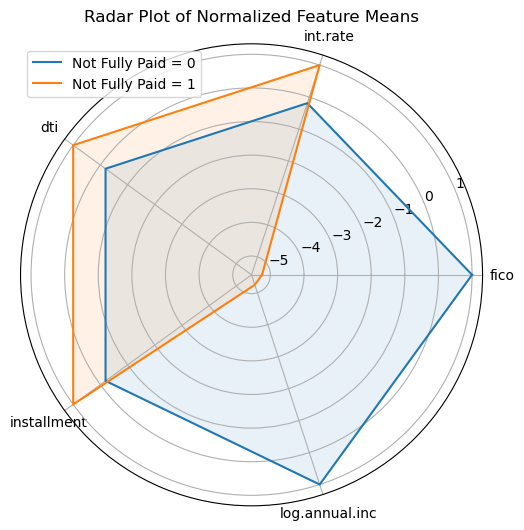

In [22]:
# 8. Polar Plot – Normalized Feature Means by Class
from math import pi

features = ['fico', 'int.rate', 'dti', 'installment', 'log.annual.inc']
df_grouped = df.groupby('not.fully.paid')[features].mean()

# Normalize
df_normalized = df_grouped / df_grouped.max()

# Radar setup
categories = list(df_normalized.columns)
N = len(categories)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
for i in df_normalized.index:
    values = df_normalized.loc[i].tolist()
    values += values[:1]
    ax.plot(angles, values, label=f"Not Fully Paid = {i}")
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title("Radar Plot of Normalized Feature Means")
plt.legend()
plt.show()


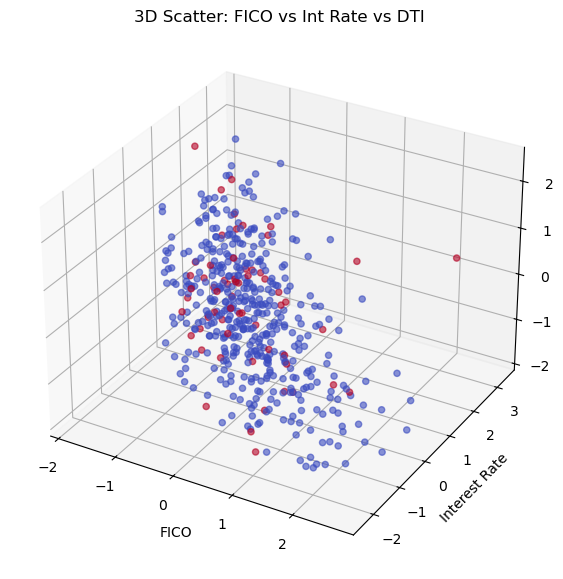

In [23]:
# 9. 3D Scatter Plot – FICO vs Interest Rate vs DTI
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
sample_df = df.sample(500)

ax.scatter(sample_df['fico'], sample_df['int.rate'], sample_df['dti'],
           c=sample_df['not.fully.paid'], cmap='coolwarm', alpha=0.6)
ax.set_xlabel('FICO')
ax.set_ylabel('Interest Rate')
ax.set_zlabel('DTI')
plt.title('3D Scatter: FICO vs Int Rate vs DTI')
plt.show()


# Model

In [24]:
X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


In [25]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Step 1: Split first (with stratify)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
    test_size=0.2, random_state=42, stratify=y)

# Step 2: Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [26]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier()
}



In [27]:
# Train models on SMOTE-resampled training set
results = []

for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)  # Train on SMOTE data
    y_pred = model.predict(X_test)           # Test on original test set
    
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'F1 Score': f1_score(y_test, y_pred, zero_division=0),
        'ROC AUC': roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    })

# Create DataFrame and sort by F1 Score
results_df = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)
print(results_df)


                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.638309   0.234890  0.557003  0.330435  0.651373
3                  SVM  0.662839   0.231379  0.475570  0.311301  0.635199
4                  KNN  0.636743   0.203957  0.436482  0.278008  0.575364
2        Random Forest  0.806889   0.324022  0.188925  0.238683  0.675832
1        Decision Tree  0.712944   0.181102  0.224756  0.200581  0.515423


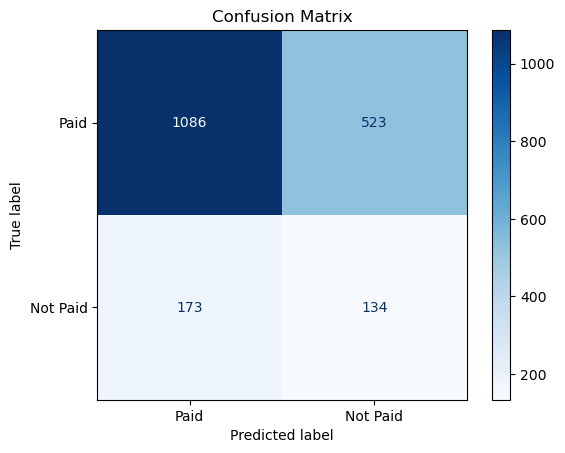

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=["Paid", "Not Paid"], cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [29]:
# Selected the Random Forest Model
final_model = RandomForestClassifier(n_estimators=100)
final_model.fit(X_train_smote, y_train_smote)

# Save it
import joblib
joblib.dump(final_model, 'loan_approval_model.pkl')

['loan_approval_model.pkl']

# Conclusion
In this project, we built a machine learning model to predict loan approval using the Loan Approval Classification dataset. After preprocessing the data and applying SMOTE to handle class imbalance, we trained and evaluated five models: Logistic Regression, Decision Tree, Random Forest, Support Vector Machine (SVM), and K-Nearest Neighbors (KNN). Among these, the Random Forest Classifier performed the best, achieving an accuracy of 80.5% and a ROC AUC score of 0.672, making it the most suitable model for deployment despite slightly lower recall and F1 scores due to class imbalance. Overall, the model pipeline was significantly improved by addressing data imbalance, and the trained model was saved using .pkl for future deployment or integration into applications. Further improvements such as hyperparameter tuning and visualization of feature importance can enhance the model's interpretability and performance.
